#### Deploying the model to estimate whether roads in Montreal are low stress or high stress for cycling.
Using the model trained on the Toronto dataset, we estimate the accessibility of Montreal's roads as a proof of concept deployment.

Import the model:

In [16]:
import all_roads_model_v1_2

define other requirements

In [17]:
from model_functions_v1_2 import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('dark_background')
plt.style.use('seaborn-colorblind')
sns.set_context("notebook")

Import train data, train model

In [18]:
train_path = 'C:/Users/Keagan Rankin/Documents/PycharmProj/data/training_data/centrelinebike_train_spatial.csv'
train_data = pd.read_csv(train_path)

print(train_data.shape)
train_data.head(2)

(47685, 24)


,Unnamed: 0,OBJECTID,GEO_ID,LFN_ID,LF_NAME,FNODE,TNODE,ONE_WAY_DI,length_in_,GEO_ID_1,...,FEATURE_CODE,FEATURE_CODE_DESC,LINEAR_NAME_TYPE,LINEAR_NAME_FULL,geometry_y,LTS str,high access,INFRA_HIGHORDER,bikelane,AREA_ID
0,1079,1080,20232571,19042,Lobo Mews,20232572,20232553,0,25.816388,20232571,...,201600.0,Other,Mews,Lobo Mews,LINESTRING (618898.5346417543 4832793.03467004...,2,1,NaN,0,2480079.0
1,18899,18900,20111543,14225,Ln N Eglinton W Marlee,20061797,20111546,0,57.456020,20111543,...,201700.0,Laneway,NaN,Ln N Eglinton W Marlee,LINESTRING (625740.8751943215 4839560.42273792...,2,1,NaN,0,2480152.0


In [19]:
model_montreal = all_roads_model_v1_2.train(train_data=train_data, model_name='forest', save_model=False)

[INFO] starting training.
Principal component 0
explains 74.43585706060858 % of the variance in "lon" and "lat".
Principal component 1
explains 25.564142939391427 % of the variance in "lon" and "lat".
[INFO] finished feature engineering.
[INFO] finished training random forest model.
[INFO] skipping metrics.
[INFO] complete.


QUICKLY ENSURING OUR MODEL STILL WORKS BY USING THE TORONTO TEST SET

In [20]:
test_path = 'C:/Users/Keagan Rankin/Documents/PycharmProj/data/test_data/centrelinebike_test_spatial.csv'
#'C:/Users/Keagan Rankin/Documents/PycharmProj/data/training_data/centreline_train_spatial.csv'
test_data = pd.read_csv(test_path)
print(test_data.shape)
test_data.head(2)

(11922, 24)


,Unnamed: 0,OBJECTID,GEO_ID,LFN_ID,LF_NAME,FNODE,TNODE,ONE_WAY_DI,length_in_,GEO_ID_1,...,FEATURE_CODE,FEATURE_CODE_DESC,LINEAR_NAME_TYPE,LINEAR_NAME_FULL,geometry_y,LTS str,high access,INFRA_HIGHORDER,bikelane,AREA_ID
0,47690,47691,106926,7738,Delbeatrice Cres,13445459,13445516,0,281.171884,106926,...,201500.0,Local,Cres,Delbeatrice Cres,LINESTRING (648354.4281005409 4849245.64534944...,2,1,NaN,0,2480068.0
1,37331,37332,112076,7785,Dunlop Ave,13455591,13455547,0,86.857583,112076,...,201500.0,Local,Ave,Dunlop Ave,LINESTRING (639852.2899312046 4841572.18981330...,1,1,NaN,0,2480084.0


In [21]:
y_test_pred, y_test_prob = all_roads_model_v1_2.predict_test(data=test_data, model=model_montreal)

Principal component 0
explains 74.23046787174377 % of the variance in "lon" and "lat".
Principal component 1
explains 25.769532128256245 % of the variance in "lon" and "lat".
[INFO] finished feature engineering
[ERROR] modeltype randomforest has no "predict_proba_". Not returning
[INFO] complete.


In [22]:
print(y_test_pred[0:5])
y_test_actual = test_data['high access']
y_test_actual.head()

print(mean_squared_error(y_test_actual, y_test_pred))
print(f1_score(y_test_actual, y_test_pred, average='weighted'))
print(accuracy_score(y_test_actual, y_test_pred))

[1 1 1 1 0]
0.10694514343231001
0.899012787871231
0.89305485656769


##### Predicting Montreal accessibility
Import the data, run it through the model

In [23]:
montreal_data = pd.read_csv('montreal.csv')
montreal_data = montreal_data.rename({'CLASSE':'FEATURE_CODE_DESC'}, axis=1)

# mapper isnt working in function for some silly reason, so map feature codes here
montreal_data['FEATURE_CODE_DESC'] = montreal_data['FEATURE_CODE_DESC'].replace({'Minor Arterial':'Arterial',
                                                                                 'Major Arterial':'Arterial',
                                                                                }
                                                                               )

print(montreal_data['FEATURE_CODE_DESC'].unique())
montreal_data.head()

['Local' 'Collector' 'Arterial' 'Private']


,Unnamed: 0,ID_TRC,ARR_GCH,FEATURE_CODE_DESC,TYP_VOIE,NOM_VOIE,geometry,bikelane,TYPE_VOIE,TYPE_NAME,NOM_ARR_VI
0,0,1010001,Ahuntsic-Cartierville,Local,avenue,Adhémar-Mailhiot,LINESTRING (-73.74080484082164 45.518959558860...,0,NaN,NaN,NaN
1,1,1010004,Ahuntsic-Cartierville,Local,place,D'Aiguillon,LINESTRING (-73.70623530423325 45.527646493721...,0,NaN,NaN,NaN
2,2,1010005,Ahuntsic-Cartierville,Local,avenue,Albert-LeSage,LINESTRING (-73.73715005426241 45.524461693194...,0,NaN,NaN,NaN
3,3,1010006,Ahuntsic-Cartierville,Local,avenue,Albert-Prévost,LINESTRING (-73.73586907660388 45.521190852218...,0,NaN,NaN,NaN
4,4,1010007,Ahuntsic-Cartierville,Local,avenue,Albert-Prévost,LINESTRING (-73.73660761184273 45.521658249632...,0,NaN,NaN,NaN


In [24]:
# Trail is commented out as a feature in the function file. Would add this if adding the seperated bike lanes from EDA file
y_montreal_pred, y_montreal_prob = all_roads_model_v1_2.predict_general(data=montreal_data, model=model_montreal)

Principal component 0
explains 80.26293163109611 % of the variance in "lon" and "lat".
Principal component 1
explains 19.737068368903895 % of the variance in "lon" and "lat".
[INFO] finished feature engineering
[ERROR] modeltype randomforest has no "predict_proba_". Not returning
[INFO] complete.


In [25]:
# Display Results
print(y_montreal_pred[0:5])

# Format data into a geoframe
montreal_gpd = montreal_data
montreal_gpd['geometry'] = montreal_gpd['geometry'].apply(wkt.loads)
montreal_gpd = gpd.GeoDataFrame(montreal_gpd, geometry='geometry')

[1 1 1 1 1]


In [36]:
montreal_gpd['model_prediction'] = y_montreal_pred

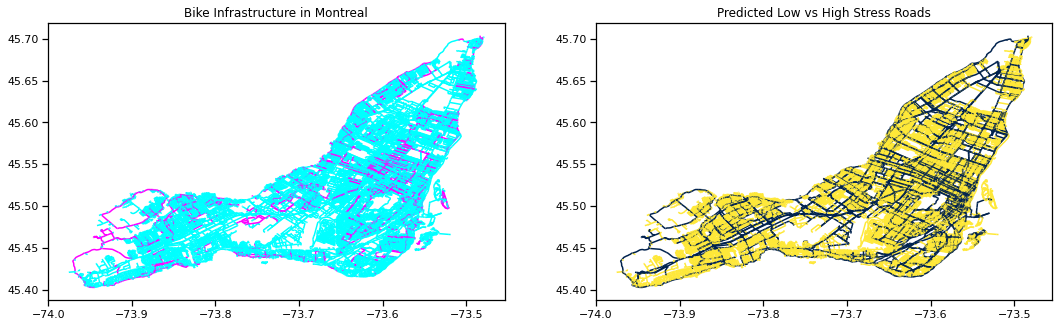

In [68]:
# Plot the results
fig, ax = plt.subplots(figsize=(18,8), ncols=2)

montreal_gpd.plot(ax=ax[0], column='bikelane', cmap='cool')
montreal_gpd.plot(ax=ax[1], column='model_prediction', cmap='cividis')

ax[0].title.set_text('Bike Infrastructure in Montreal')
ax[1].title.set_text('Predicted Low vs High Stress Roads')

#fig.supxlabel('longitude')
#fig.supylabel('latitude')

plt.show()
#fig.savefig('Montreal predictions.png', bbox_inches='tight')